# Gudetama or Lame Egg

**Goal:** Create & explain a tensor model that can classify images of Alpaca's and non Alpaca's.  
**Strech Goal:** Classify if an image is Gudetama or just a lame egg 🥚. 

[Following this Guide]('https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb')

### Plan
1. Develop Null Hypothesis 
2. Data Collection  
~~3. E.D.A.~~  
~~4. Model Selection (w/ PyCaret)~~
5. Make Model
6. Tune Model
7. Repeat steps 5 and 6 until you find the sweet spot. 

In [1]:
# import dependancies
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# ! pip install tensorflow

## Create Datasets  

### Import my ~~Animals~~ Dataset

In [3]:
data_dir = 'gude/'

In [4]:
# define parameters
batch_size = 32
img_height = 180
img_width = 180

### Create Training Dataset

In [5]:
#call 'image_dataset_from_directory' to create a training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 205 files belonging to 2 classes.
Using 164 files for training.


### Create Testing/Validation Dataset

In [6]:
# create a testing dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 205 files belonging to 2 classes.
Using 41 files for validation.


### Verify Labels and View Images

In [7]:
class_names = train_ds.class_names
print(class_names)

['gudetama', 'lame egg']


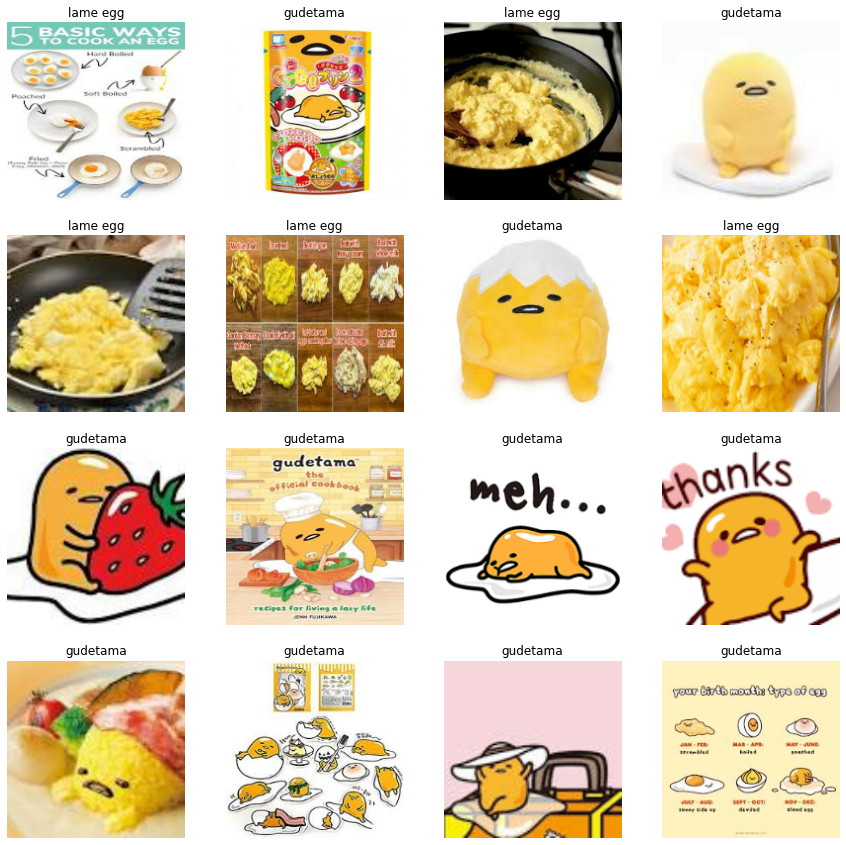

In [8]:
#viz the data with current labels

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Augmenting Images (Data to Improve Model)

In [9]:
#define parameters of the image messer-upper
datagen = ImageDataGenerator(zca_whitening=True,
                            horizontal_flip=True,
                            vertical_flip=True)

C:\Users\tayly\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [10]:
#fit the model to the training data
# datagen.fit(train_ds)

In [11]:
# help(train_ds)

## Now let's Build a Model (cue intense music)

In [20]:
# this inits some stuff behind the scenes that I flat out don't understand
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
# this line takes the RGB values from the pixels and scales them down to fall between 0 and 1
# we are going to do this when you create the model

#normalization_layer = layers.Rescaling(1./255)

In [22]:
# here is where the magic SHOULD happen
# we are building a sequential model which is.....a thing that I built

num_classes = len(class_names)

model_v1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # here is where we rescale the RGB values
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [23]:
# help(model)

In [24]:
# here we complie the model.....which is ...another thing that you do
model_v1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model_v1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

## Now we Train the Model 
Considering that I thought I just did that, I'm very confused.  
NOTE TO SELF: Look up what the heck you just did when you built the model.  
- Can I think of this as 'building the Brain?
- Did i just create the shell or the 'nodes'. (I think so.)
- Sequential much imply that it literally goes... in order. (Duh, you dingus.)
- Can I display this is tensor flow play groound with the information that I have here? 

In [26]:
epochs=10
history = model_v1.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/10
6/6 [==============================] - 3s 381ms/step - loss: 1.4371 - accuracy: 0.5305 - val_loss: 0.6727 - val_accuracy: 0.6585
Epoch 2/10
6/6 [==============================] - 2s 411ms/step - loss: 0.6680 - accuracy: 0.5610 - val_loss: 0.6311 - val_accuracy: 0.6341
Epoch 3/10
6/6 [==============================] - 2s 373ms/step - loss: 0.6227 - accuracy: 0.6585 - val_loss: 0.5993 - val_accuracy: 0.6341
Epoch 4/10
6/6 [==============================] - 2s 357ms/step - loss: 0.5824 - accuracy: 0.6768 - val_loss: 0.5755 - val_accuracy: 0.7073
Epoch 5/10
6/6 [==============================] - 2s 358ms/step - loss: 0.4820 - accuracy: 0.7866 - val_loss: 0.5363 - val_accuracy: 0.7073
Epoch 6/10
6/6 [==============================] - 4s 697ms/step - loss: 0.3716 - accuracy: 0.8232 - val_loss: 0.4636 - val_accuracy: 0.7561
Epoch 7/10
6/6 [==============================] - 4s 695ms/step - loss: 0.2960 - accuracy: 0.9024 - val_loss: 0.4390 - val_accuracy: 0.8049
Epoch 8/10
6/6 [====

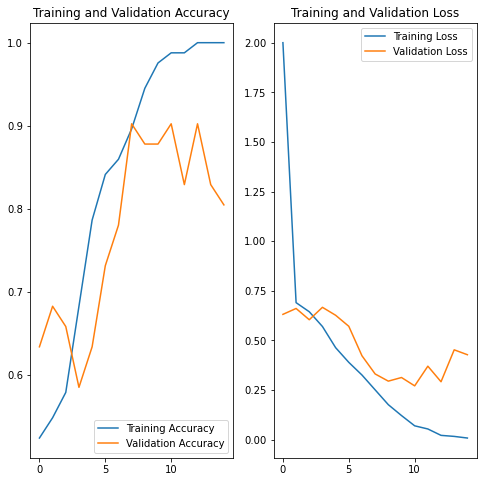

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Testing (drum roll)

In [63]:
def show_results(img, title):
    plt.figure(figsize=(9, 9))
    plt.imshow(img)
    plt.title(title,{'fontsize': 20,'fontweight' : 6})
    plt.axis("off")

    return plt

In [71]:
def classify_egg():
    test_url = input("Drop in a link to your picture:")
    test_path = tf.keras.utils.get_file(origin=test_url)

    img = tf.keras.utils.load_img(
        test_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model_v1.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    title = "I'm {:.2f}% confident this is {}.".format(100 * np.max(score), class_names[np.argmax(score)])
    
    return show_results(img, title)

Holy crap! I'm going to pull in my own photo!

Paste in your url:https://ohsweetbasil.com/wp-content/uploads/how-to-fry-an-egg-how-to-cook-a-fried-egg-recip-4-500x500.jpg


<module 'matplotlib.pyplot' from 'C:\\Users\\tayly\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

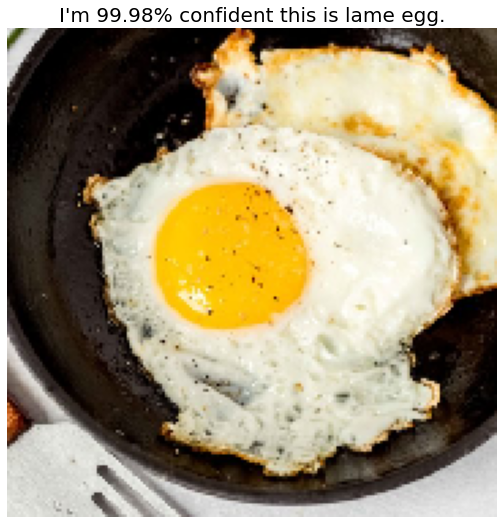

In [70]:
classify_egg()

https://ohsweetbasil.com/wp-content/uploads/how-to-fry-an-egg-how-to-cook-a-fried-egg-recip-4-500x500.jpg


('This image most likely belongs to lame egg with a 99.98 percent confidence.',
 <module 'matplotlib.pyplot' from 'C:\\Users\\tayly\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>)

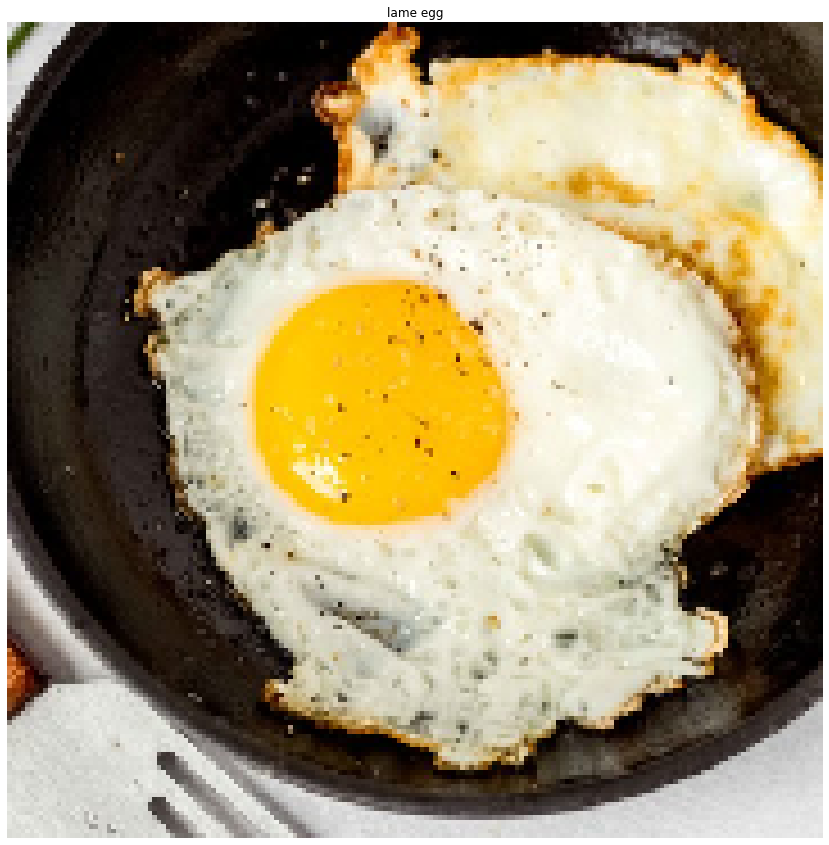

In [41]:
gude_or_tama()

In [29]:
gude_or_tama()

https://st.depositphotos.com/3246207/4288/i/950/depositphotos_42881183-stock-photo-smiling-easter-egg-with-hand.jpg
73728/59218 [=====================================] - 0s 0us/step


'This image most likely belongs to gudetama with a 85.71 percent confidence.'

In [31]:
gude_or_tama()

https://ohsweetbasil.com/wp-content/uploads/how-to-fry-an-egg-how-to-cook-a-fried-egg-recip-4-500x500.jpg
57344/48880 [===================================] - 0s 0us/step


'This image most likely belongs to lame egg with a 99.98 percent confidence.'

## Test 1 (Justin's Llama - Easy) ✅

In [ ]:
test_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7ryn0byT2a-4KI_i0K_TmwgAD_b_6cUcCjg&usqp=CAU'
test_path = tf.keras.utils.get_file(origin=test_url)

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_v1.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image is most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

## Test 2 (Justin's Alpaca - Hard) ✅

In [38]:
tay2_url = 'https://cdn.britannica.com/41/147641-050-36325895/Alpaca.jpg?w=400&h=300&c=crop'
tay2_path = tf.keras.utils.get_file(origin=tay2_url)

img = tf.keras.utils.load_img(
    tay2_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_v1.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

32768/20128 [================================================] - 0s 0us/step
This image most likely belongs to lame egg with a 97.40 percent confidence.


## Test 3 (Alex's Giant Adorable Dog) ✅

In [37]:
# test = tf.keras.utils.image_dataset_from_directory('animals/AC_pup.png')

# tay3_url = 'animals/'
# tay3_path = tf.keras.utils.get_file(origin=tay3_url, fname='AC_pup.png')

img = tf.keras.utils.load_img('animals/AC_pup.png', target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_v1.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

FileNotFoundError: [Errno 2] No such file or directory: 'animals/AC_pup.png'

<module 'matplotlib.pyplot' from 'C:\\Users\\tayly\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

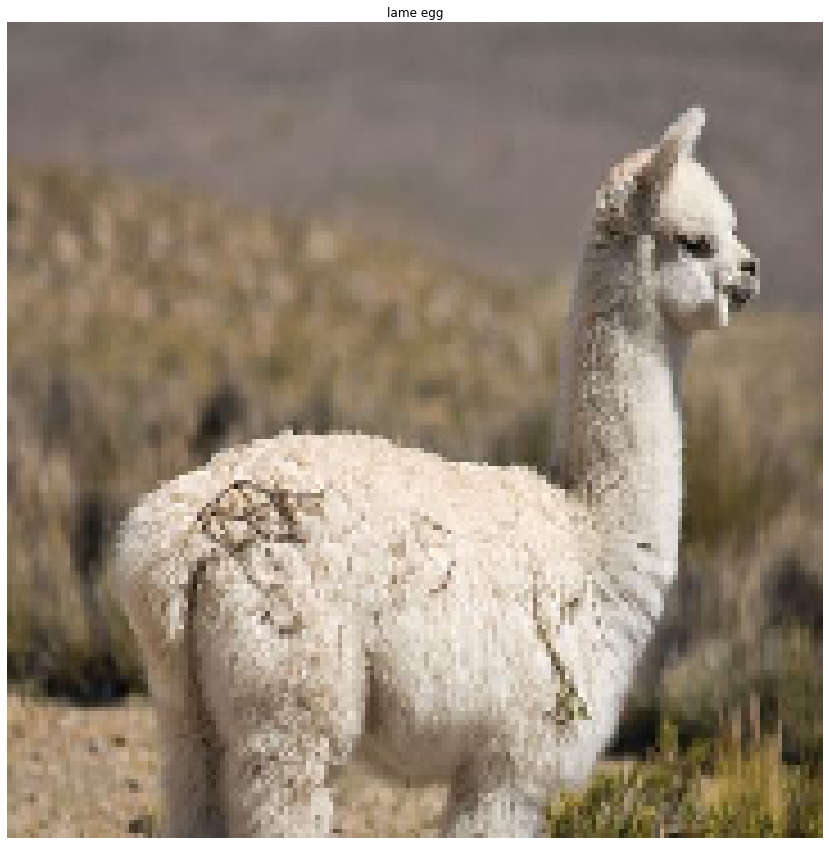

In [39]:
show_results(img)

## Test 4 (Pink Roses) ❌

In [ ]:
tay3_url = 'https://flowermag.com/wp-content/uploads/2018/04/english-rose-2-thegem-blog-timeline-large.jpg'
tay3_path = tf.keras.utils.get_file(origin=tay3_url)

img = tf.keras.utils.load_img(
    tay3_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

## Test 5 (One Pink Rose) ✅

In [ ]:
tay3_url = 'https://bloximages.chicago2.vip.townnews.com/swoknews.com/content/tncms/assets/v3/editorial/d/f3/df33d43f-f6c4-57d2-90aa-cfdcd66feaae/62733c178fa46.image.jpg?resize=331%2C500'
tay3_path = tf.keras.utils.get_file(origin=tay3_url)

img = tf.keras.utils.load_img(
    tay3_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)